<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Mutual_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/4-Information%20gain%20-%20mutual%20information%20In%20Regression.ipynb

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/NP_exo.csv')

df = df.set_index("Date") # define Date  as index

df.shape

(52416, 7)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 2013-01-01 00:00:00 to 2018-12-24 23:00:00
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    Price                    52416 non-null  float64
 1    Grid load forecast       52416 non-null  float64
 2    Wind power forecast      52416 non-null  float64
 3   NP Consumption            52416 non-null  int64  
 4   NP Consumption prognosis  52416 non-null  int64  
 5   NP Production             52416 non-null  int64  
 6   NP Production prognosis   52416 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.2+ MB


In [3]:
df.isnull().sum()

 Price                      0
 Grid load forecast         0
 Wind power forecast        0
NP Consumption              0
NP Consumption prognosis    0
NP Production               0
NP Production prognosis     0
dtype: int64

In [4]:
X=df.iloc[:, 1:7]
y=df.iloc[:, 0]
X_train = X[:-17472]; X_test = X[-17472:]
y_train = y[:-17472]; y_test = y[-17472:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((34944, 6), (34944,), (17472, 6), (17472,))

In [ ]:
X_train

In [6]:
X_train.isnull().sum()

 Grid load forecast         0
 Wind power forecast        0
NP Consumption              0
NP Consumption prognosis    0
NP Production               0
NP Production prognosis     0
dtype: int64

In [7]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.21781848, 0.04875067, 0.18236893, 0.17374261, 0.1571567 ,
       0.18046416])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

 Grid load forecast         0.217818
NP Consumption              0.182369
NP Production prognosis     0.180464
NP Consumption prognosis    0.173743
NP Production               0.157157
 Wind power forecast        0.048751
dtype: float64

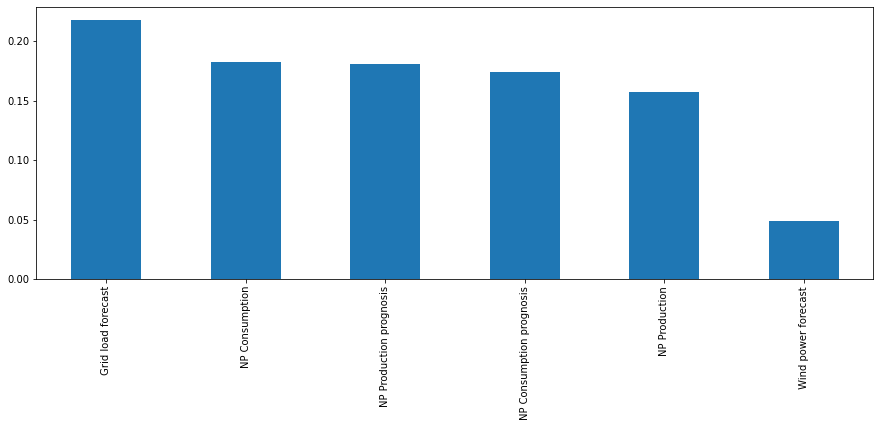

In [9]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [14]:
from sklearn.feature_selection import SelectPercentile

In [15]:
## Selecting the top 30 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=30,
                 score_func=<function mutual_info_regression at 0x7f43215d1560>)

In [16]:
selected_top_columns.get_support()

array([ True, False,  True, False, False, False])

In [17]:
X_train.columns[selected_top_columns.get_support()]

Index([' Grid load forecast', 'NP Consumption'], dtype='object')